In [1]:
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install contextily

import contextily as ctx


Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install plotly


Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install numpy pandas seaborn matplotlib statsmodels scikit-learn yellowbrick shapely 


Defaulting to user installation because normal site-packages is not writeable


In [5]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from geopandas import GeoDataFrame
from shapely.geometry import Point
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot

import warnings
warnings.filterwarnings('ignore')

print("Imports ok")

Imports ok


In [6]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


In [7]:
data = pd.read_csv("C:/Users/MrWhi/OneDrive/Desktop/univpm/DataScience/Progetto_Datascience/python/london_weather.csv")

data.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [8]:
data.columns

Index(['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth'],
      dtype='object')

In [9]:
data.dtypes

date                  int64
cloud_cover         float64
sunshine            float64
global_radiation    float64
max_temp            float64
mean_temp           float64
min_temp            float64
precipitation       float64
pressure            float64
snow_depth          float64
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [11]:
missing_values = data.isnull().sum()
missing_values = missing_values.sort_values(ascending = False)
missing_values

snow_depth          1441
mean_temp             36
cloud_cover           19
global_radiation      19
max_temp               6
precipitation          6
pressure               4
min_temp               2
date                   0
sunshine               0
dtype: int64

In [12]:
# Lista delle colonne da riempire con la media
columns_to_fill = [
    "cloud_cover",
    "global_radiation",
    "max_temp",
    "mean_temp",
    "min_temp",
    "precipitation",
    "snow_depth",
    "pressure"
]

# Riempire i valori mancanti con la media
for col in columns_to_fill:
    data[col] = data[col].fillna(data[col].mean())

In [13]:
data.isnull().sum()

date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64

In [14]:
# Extracting the Day, Month, and Year coulmns from the date column then dropping the date column
data['date'] = pd.to_datetime(data['date'],format="%Y%m%d")
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
Weather = data.drop('date', axis=1)

# Crea un dizionario che mappa i numeri dei mesi ai nomi dei mesi
month_mapping = {
    1: 'Gennaio', 2: 'Febbraio', 3: 'Marzo', 4: 'Aprile', 
    5: 'Maggio', 6: 'Giugno', 7: 'Luglio', 8: 'Agosto', 
    9: 'Settembre', 10: 'Ottobre', 11: 'Novembre', 12: 'Dicembre'
}

# Applica il mapping alla colonna 'month'
data['month'] = data['month'].map(month_mapping)

Weather.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,day,month,year
0,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1,1,1979
1,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,2,1,1979
2,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,3,1,1979
3,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,4,1,1979
4,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,5,1,1979


In [15]:
data.describe()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,day,year
count,15341,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000
mean,2000-01-01 00:00:00,5.268242,4.350238,118.756951,15.388777,11.475511,7.559867,1.668634,101536.605594,0.037986,15.730070,1999.500359
min,1979-01-01 00:00:00,0.000000,0.000000,8.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000,1.000000,1979.000000
25%,1989-07-02 00:00:00,4.000000,0.500000,41.000000,10.500000,7.100000,3.500000,0.000000,100920.000000,0.000000,8.000000,1989.000000
50%,2000-01-01 00:00:00,6.000000,3.500000,95.000000,15.000000,11.400000,7.800000,0.000000,101620.000000,0.000000,16.000000,2000.000000
75%,2010-07-02 00:00:00,7.000000,7.200000,186.000000,20.300000,16.000000,11.800000,1.600000,102240.000000,0.000000,23.000000,2010.000000
max,2020-12-31 00:00:00,9.000000,16.000000,402.000000,37.900000,29.000000,22.300000,61.800000,104820.000000,22.000000,31.000000,2020.000000
std,NaN,2.068790,4.028339,88.843200,6.553472,5.722981,5.326409,3.737809,1049.585735,0.519373,8.800562,12.121708


DATA VISUALIZATION

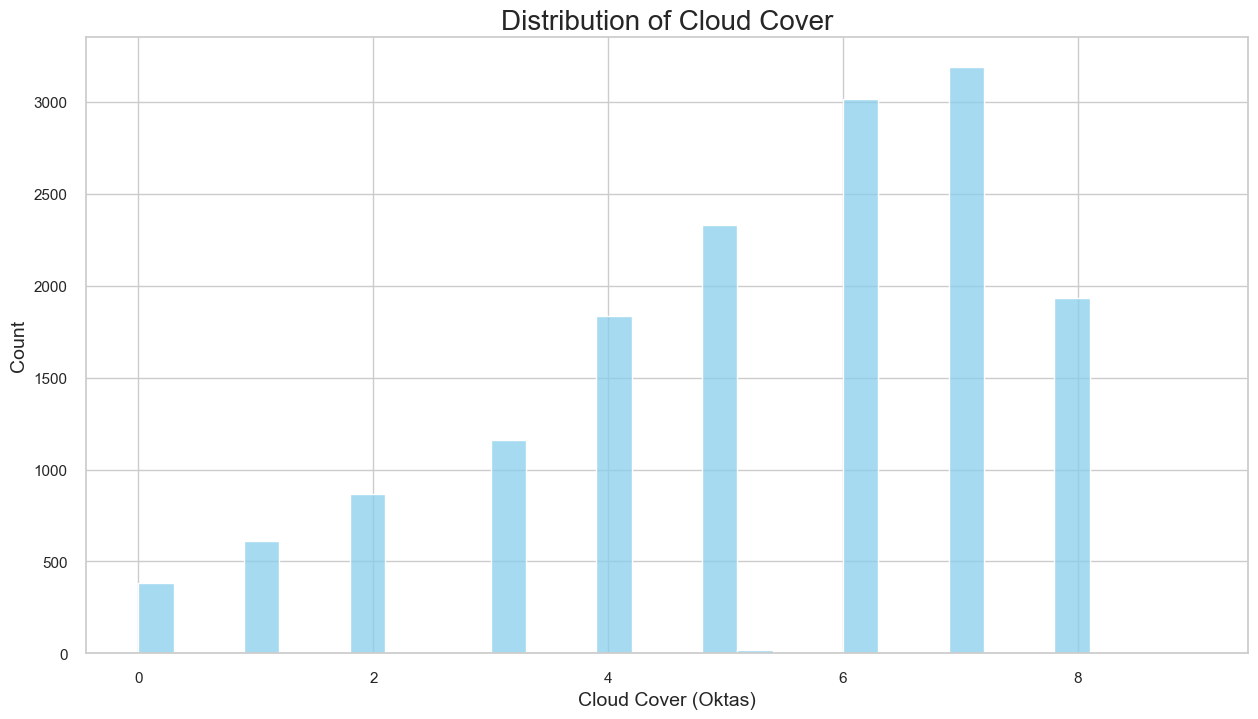

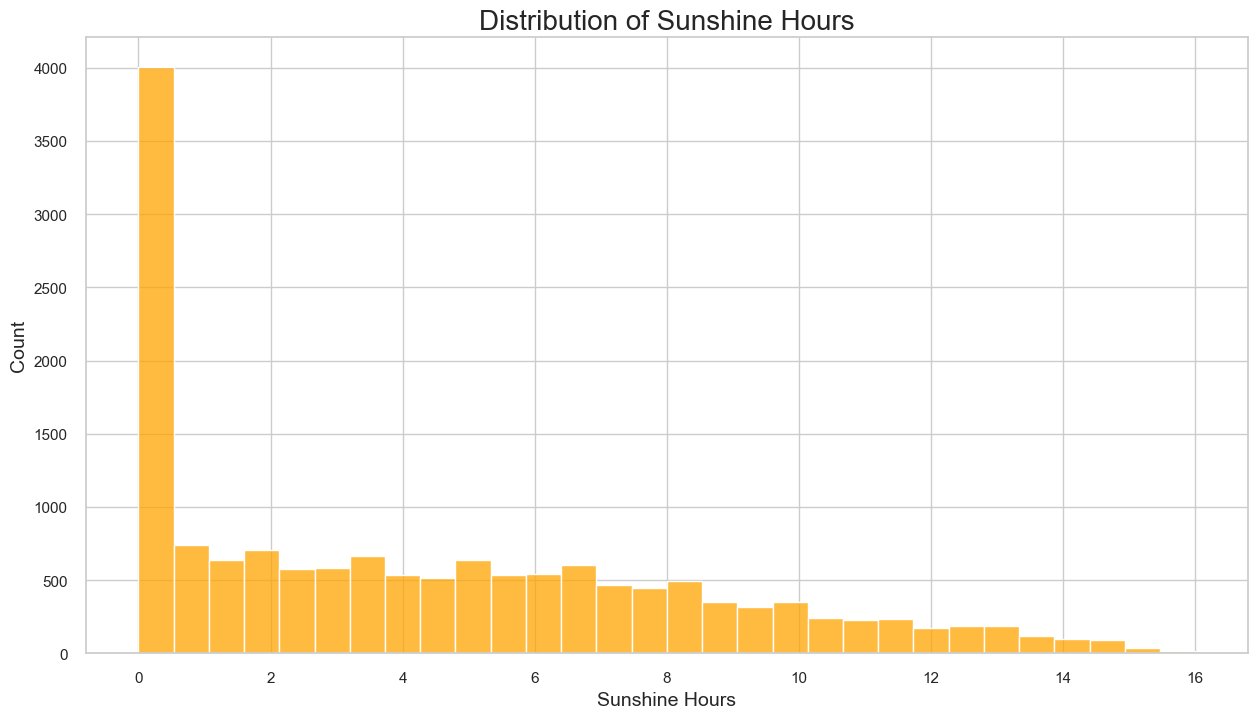

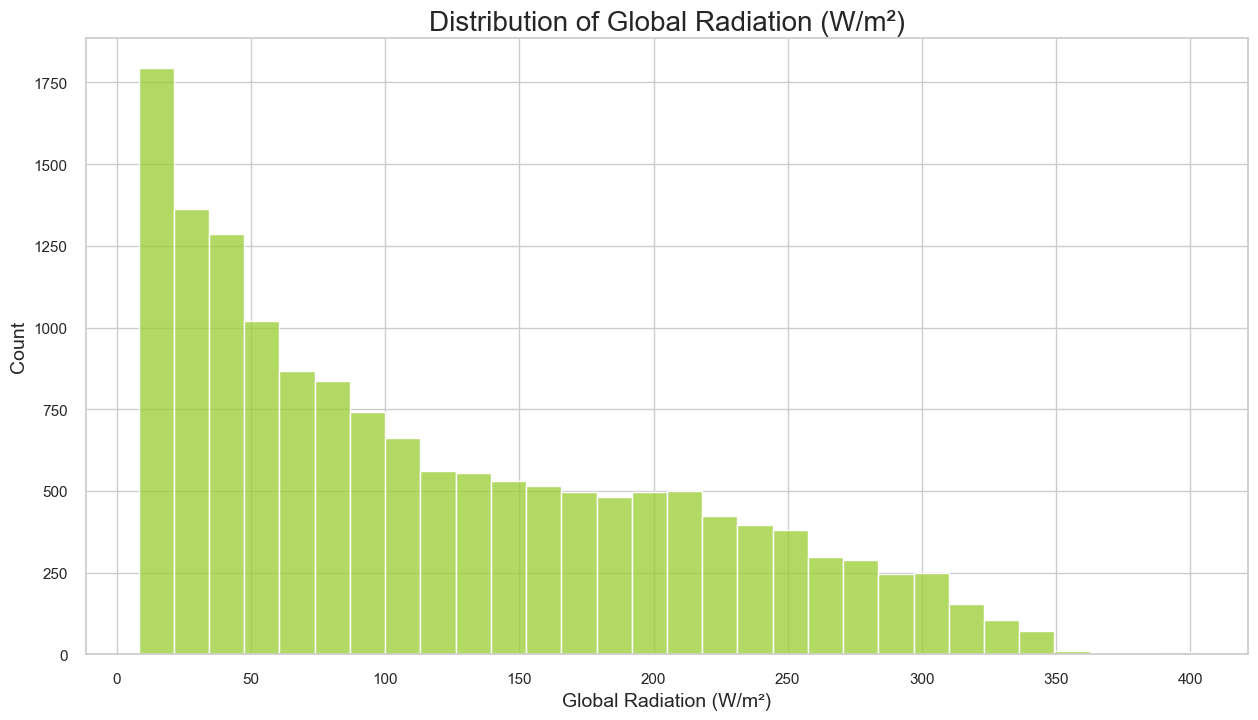

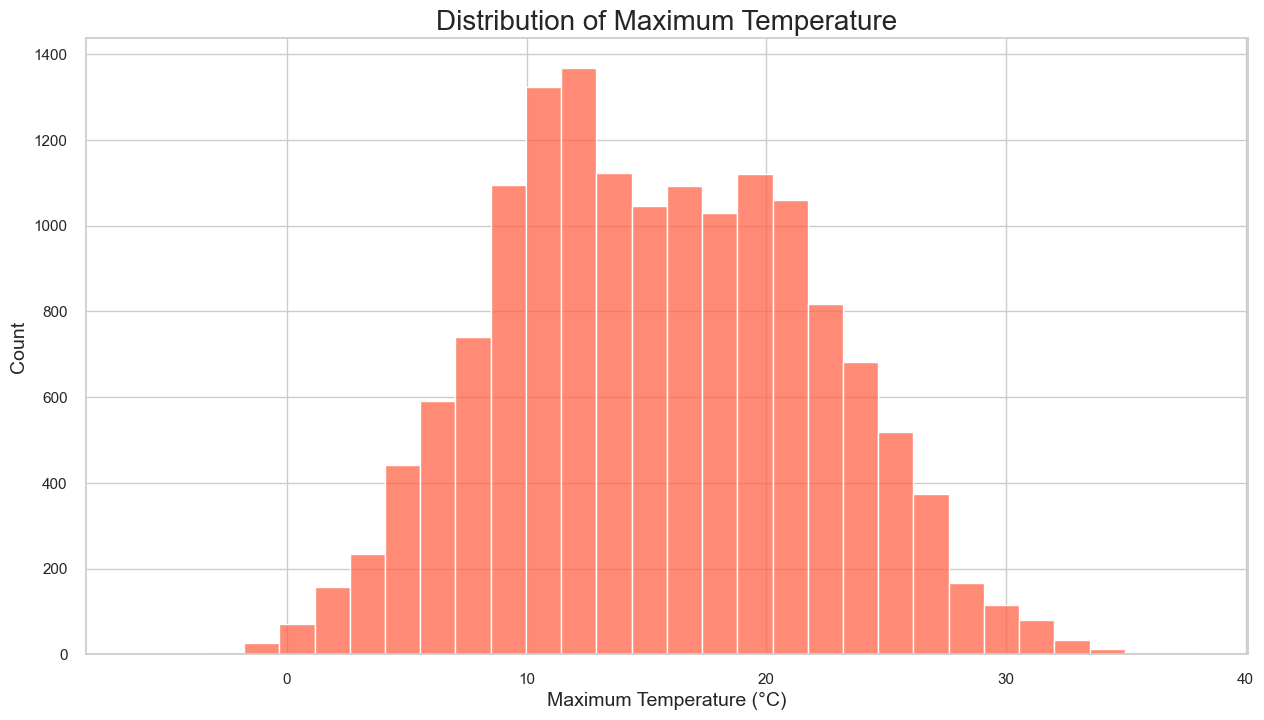

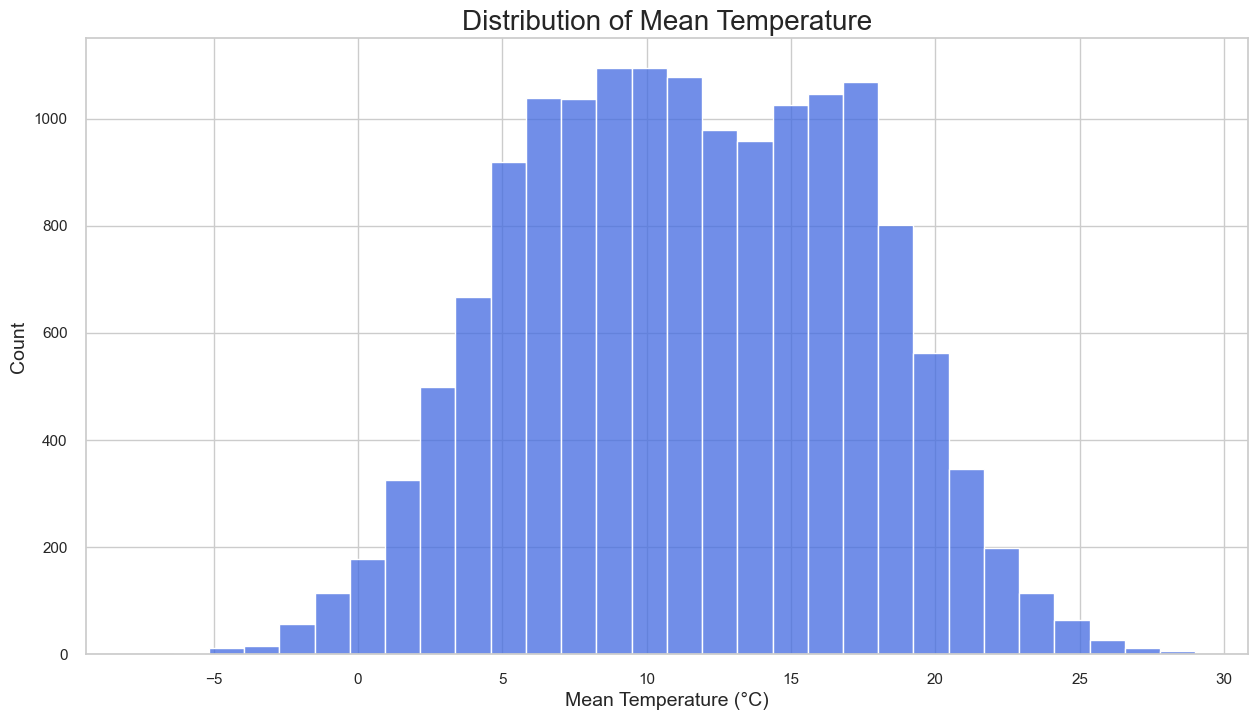

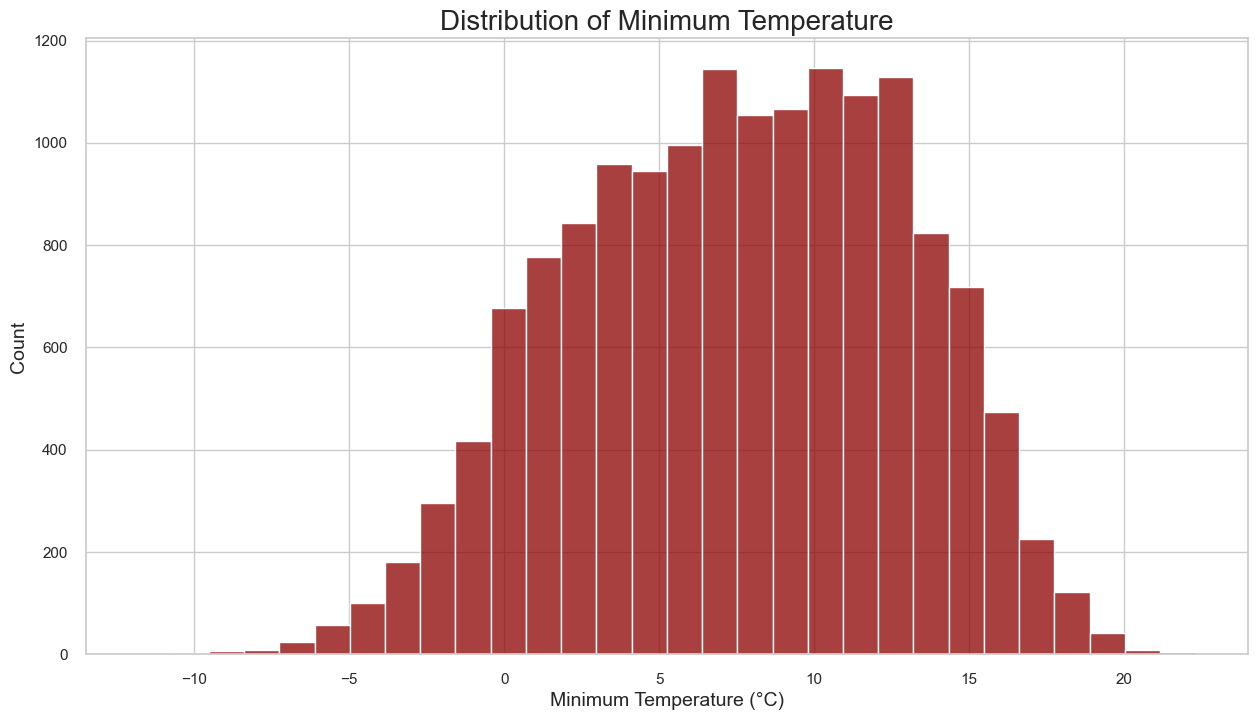

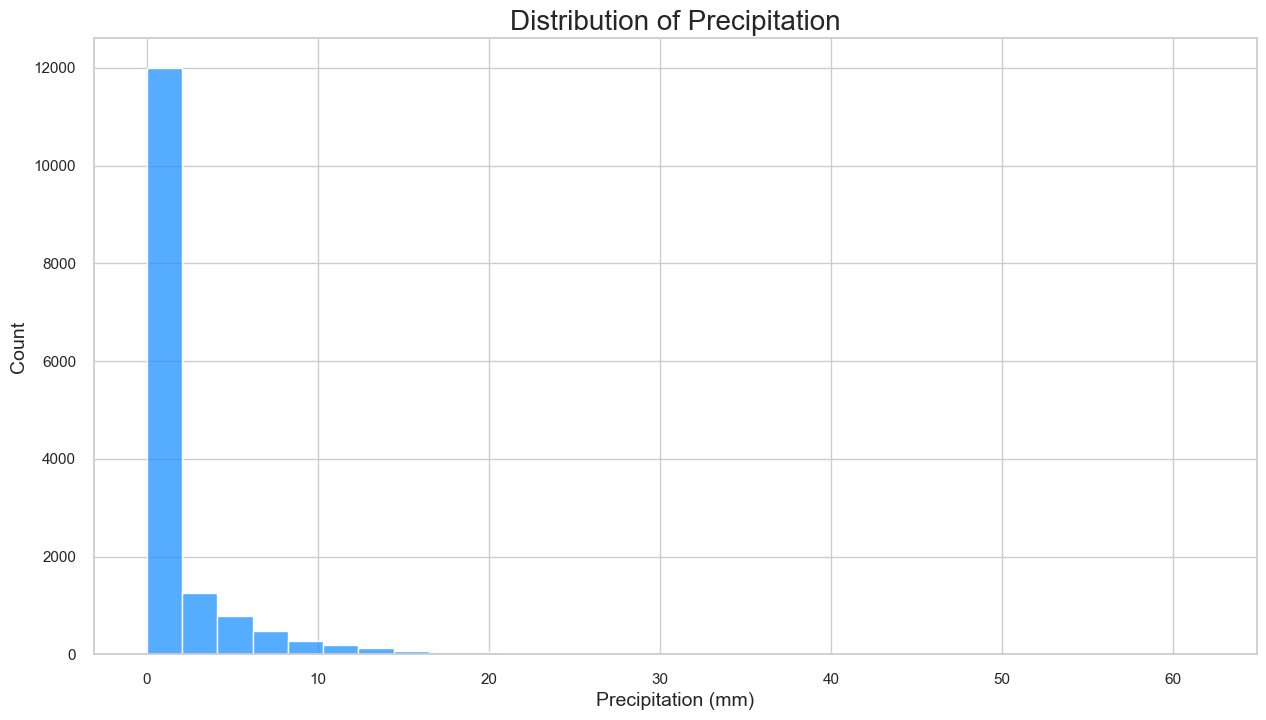

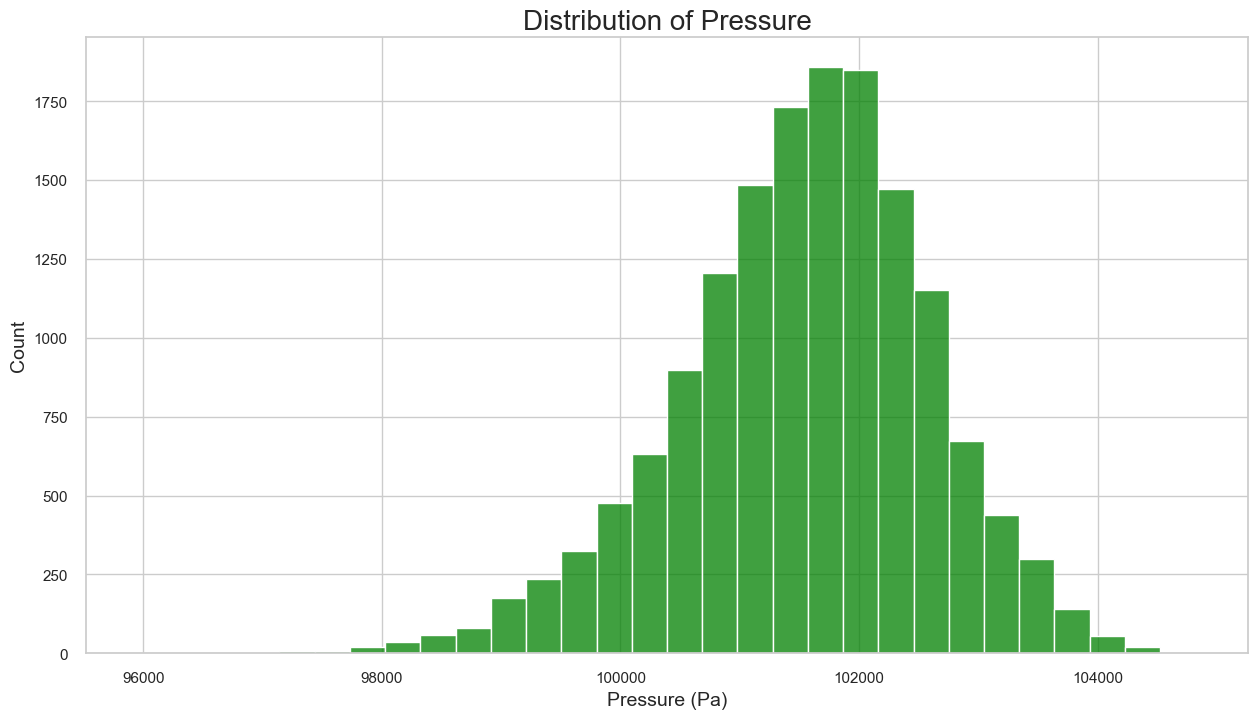

In [19]:


# Set seaborn style
sns.set(style='whitegrid')

# Cloud Cover Distribution
plt.figure(figsize=(15, 8))
sns.histplot(data['cloud_cover'], kde=False, color='skyblue', bins=30)
plt.title('Distribution of Cloud Cover', fontsize=20)
plt.xlabel('Cloud Cover (Oktas)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Sunshine Distribution
plt.figure(figsize=(15, 8))
sns.histplot(data['sunshine'], kde=False, color='orange', bins=30)
plt.title('Distribution of Sunshine Hours', fontsize=20)
plt.xlabel('Sunshine Hours', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Global Radiation Distribution
plt.figure(figsize=(15, 8))
sns.histplot(data['global_radiation'], kde=False, color='yellowgreen', bins=30)
plt.title('Distribution of Global Radiation (W/m²)', fontsize=20)
plt.xlabel('Global Radiation (W/m²)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Max Temperature Distribution
plt.figure(figsize=(15, 8))
sns.histplot(data['max_temp'], kde=False, color='tomato', bins=30)
plt.title('Distribution of Maximum Temperature', fontsize=20)
plt.xlabel('Maximum Temperature (°C)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Mean Temperature Distribution
plt.figure(figsize=(15, 8))
sns.histplot(data['mean_temp'], kde=False, color='royalblue', bins=30)
plt.title('Distribution of Mean Temperature', fontsize=20)
plt.xlabel('Mean Temperature (°C)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Min Temperature Distribution
plt.figure(figsize=(15, 8))
sns.histplot(data['min_temp'], kde=False, color='darkred', bins=30)
plt.title('Distribution of Minimum Temperature', fontsize=20)
plt.xlabel('Minimum Temperature (°C)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Precipitation Distribution
plt.figure(figsize=(15, 8))
sns.histplot(data['precipitation'], kde=False, color='dodgerblue', bins=30)
plt.title('Distribution of Precipitation', fontsize=20)
plt.xlabel('Precipitation (mm)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Pressure Distribution
plt.figure(figsize=(15, 8))
sns.histplot(data['pressure'], kde=False, color='green', bins=30)
plt.title('Distribution of Pressure', fontsize=20)
plt.xlabel('Pressure (Pa)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()





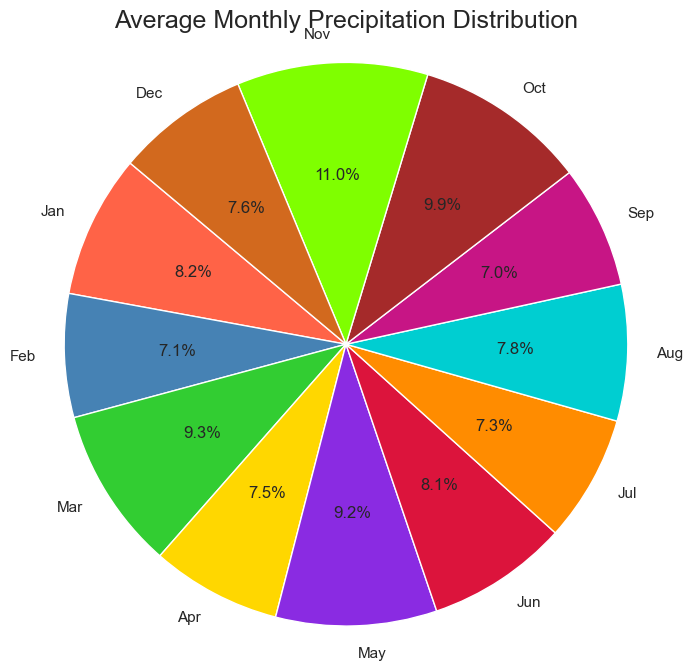

In [17]:
# Calcolare la precipitazione media mensile
monthly_precip = data.groupby('month')['precipitation'].mean()

# Definire le etichette dei mesi
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Crea il grafico a torta con colori distinti
plt.figure(figsize=(8, 8))
plt.pie(monthly_precip, labels=month_labels, autopct='%1.1f%%', startangle=140, 
        colors=['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2', '#DC143C', '#FF8C00', '#00CED1', 
                '#C71585', '#A52A2A', '#7FFF00', '#D2691E'])

# Impostazioni del grafico
plt.title('Average Monthly Precipitation Distribution', fontsize=18)
plt.axis('equal')  # Per renderlo un cerchio perfetto
plt.show()

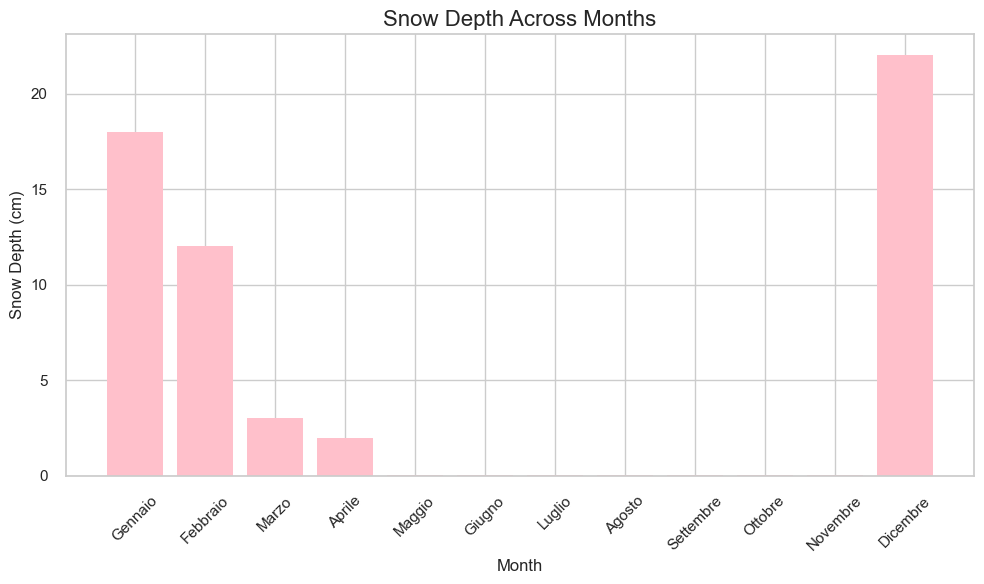

In [29]:

# Plotting the bar chart with a single color (e.g., 'lightblue') for snow depth
plt.figure(figsize=(10, 6))
plt.bar(data['month'], data['snow_depth'], color='pink', edgecolor='none')

# Title and labels
plt.title('Snow Depth Across Months', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Snow Depth (cm)', fontsize=12)

# Customize the plot's background color
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

# Show the plot
plt.xticks(rotation=45)  # Rotate month labels for better readability
plt.tight_layout()
plt.show()


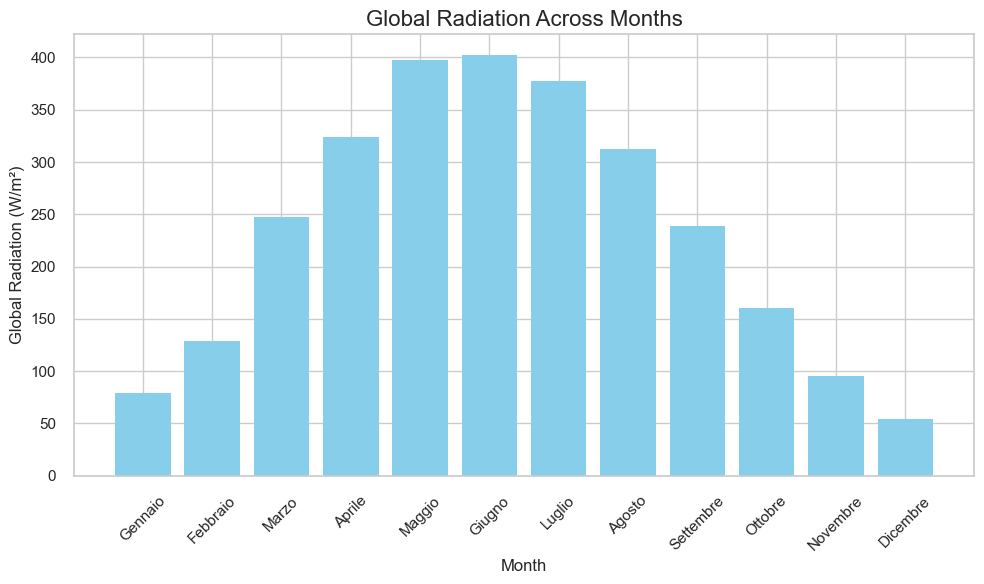

In [26]:


# Plotting the bar chart with a single color (e.g., 'skyblue') and no border
plt.figure(figsize=(10, 6))
plt.bar(data['month'], data['global_radiation'], color='skyblue', edgecolor='none')

# Title and labels
plt.title('Global Radiation Across Months', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Global Radiation (W/m²)', fontsize=12)

# Customize the plot's background color
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

# Show the plot
plt.xticks(rotation=45)  # Rotate month labels for better readability
plt.tight_layout()
plt.show()


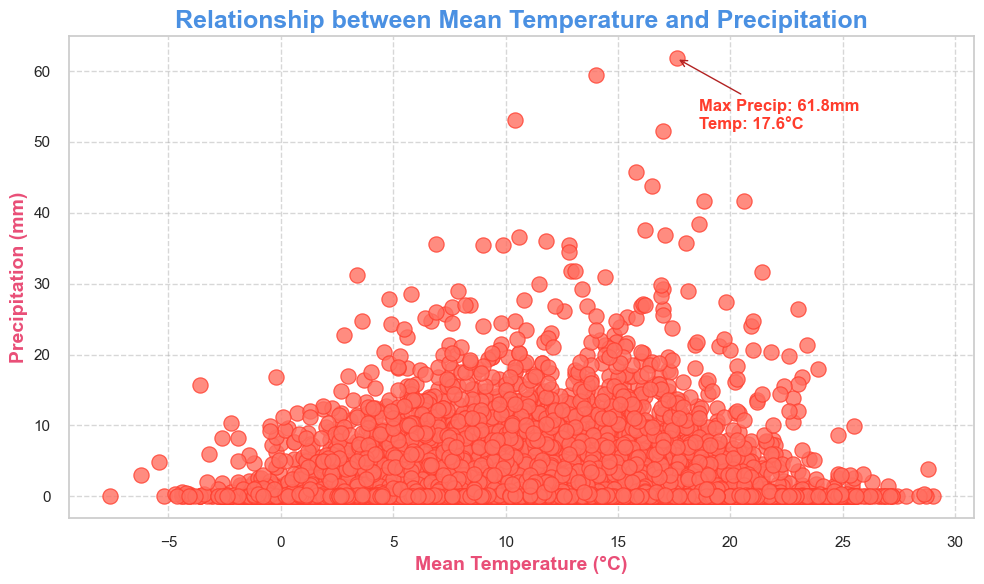

In [194]:

# Set Seaborn style to improve aesthetics
sns.set(style="whitegrid")

# Create the scatter plot with vibrant colors and some extra styling
plt.figure(figsize=(10, 6))

# Use a beautiful color palette for the scatter plot points
sns.scatterplot(x=data['mean_temp'], y=data['precipitation'], 
                color='#FF6F61', edgecolor='#FF3D2D', s=120, alpha=0.8)

# Add title and labels with more appealing formatting
plt.title("Relationship between Mean Temperature and Precipitation", 
          fontsize=18, fontweight='bold', color='#4A90E2')
plt.xlabel("Mean Temperature (°C)", fontsize=14, fontweight='bold', color='#E94E77')
plt.ylabel("Precipitation (mm)", fontsize=14, fontweight='bold', color='#E94E77')

# Add a light grid with soft pastel lines
plt.grid(True, linestyle='--', alpha=0.5, color='#B1B1B1')

# Add an annotation for a specific point (e.g., maximum precipitation)
max_precip = data['precipitation'].max()
max_temp = data[data['precipitation'] == max_precip]['mean_temp'].values[0]
plt.annotate(f'Max Precip: {max_precip}mm\nTemp: {max_temp}°C', 
             xy=(max_temp, max_precip), 
             xytext=(max_temp + 1, max_precip - 10),
             arrowprops=dict(facecolor='#FF3D2D', edgecolor='#B22222', arrowstyle='->', lw=1),
             fontsize=12, color='#FF3D2D', weight='bold')

# Adjust layout to make the plot more visually balanced
plt.tight_layout()

# Show the plot
plt.show()







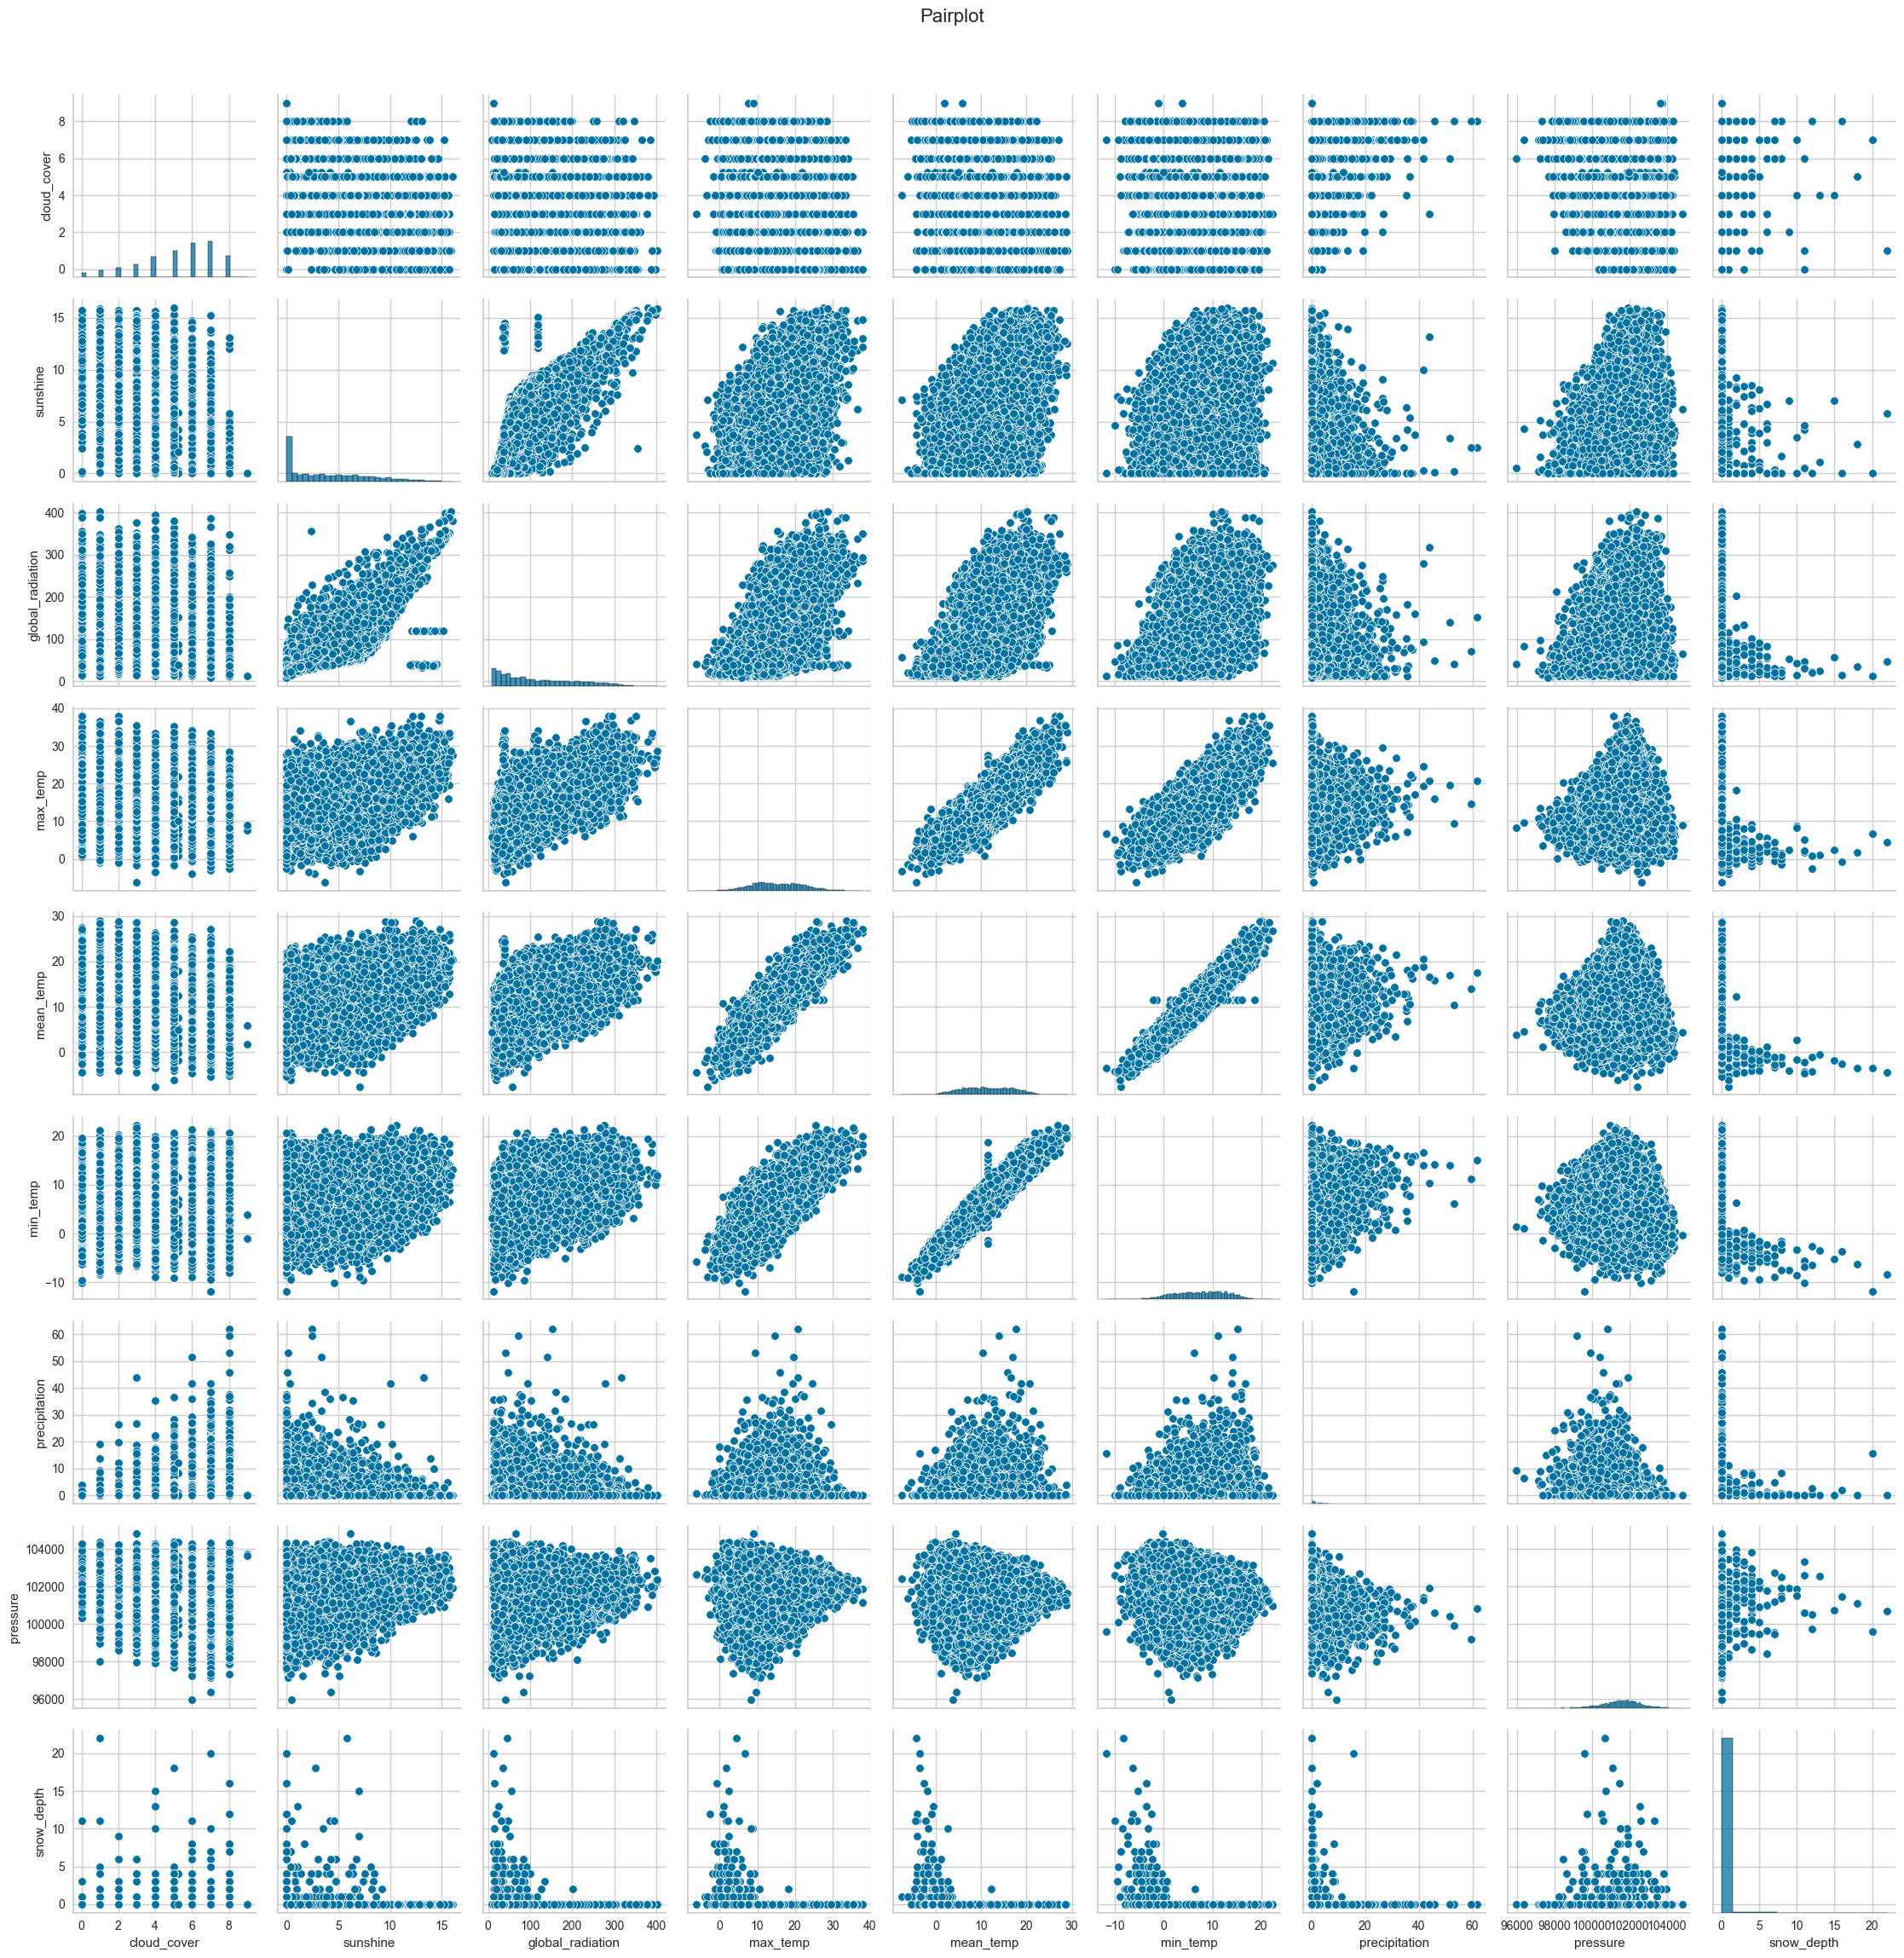

In [ ]:


# Selezioniamo le colonne numeriche
selected_columns = ['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 
                    'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth']

# Creiamo il pairplot senza l'uso del kde, solo scatter plots
sns.pairplot(data[selected_columns], diag_kind="hist", palette="Set2")

# Aggiungiamo un titolo al grafico
plt.suptitle('Pairplot', y=1.02, fontsize=16)

# Rende il layout più compatto
plt.tight_layout()

# Mostriamo il grafico
plt.show()



<Axes: >

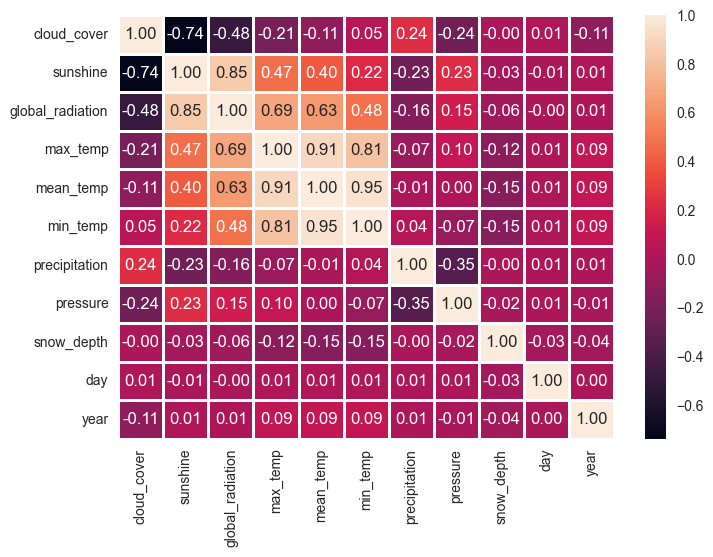

In [191]:
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.2f', linewidths=2)
